In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf 
from tensorflow import keras

2022-07-07 23:58:51.555045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-07 23:58:51.555267: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [7]:
type(X_train)

numpy.ndarray

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [9]:
type(X_train)

numpy.ndarray

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

2022-07-02 14:44:49.388198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-02 14:44:49.388297: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-02 14:44:49.388390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nilesh-Inspiron-3521): /proc/driver/nvidia/version does not exist


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['mae'])

In [11]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.

In [12]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3942 - mae: 0.4502


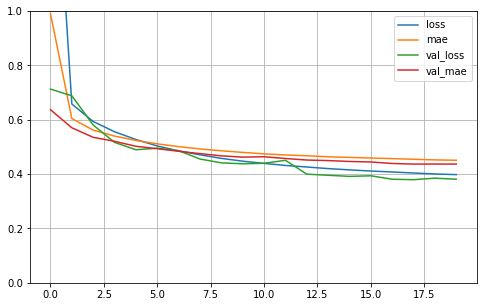

In [13]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
X_new=X_test[:3]

In [15]:
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 142ms/step


In [16]:
print(y_pred)
print(y_test[:3])

[[0.53287673]
 [1.8915398 ]
 [3.404087  ]]
[0.477   0.458   5.00001]


In [17]:
del model

In [18]:
keras.backend.clear_session()

# Functional API

In [19]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [21]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['mae'])

In [22]:
model_history=model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 2s 4ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/40
363/363 [==============================] - 1s 4ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/40
363/363 [==============================] - 1s 4ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/40
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [23]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3685 - mae: 0.4314


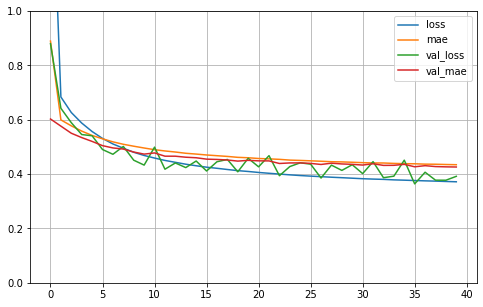

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.save('my_func_model.h5')

In [26]:
pwd

'/home/nilesh/ml_course_notebooks'

In [27]:
del model


In [28]:
keras.backend.clear_session()

In [29]:
%cd '/home/nilesh/ml_course_notebooks'

/home/nilesh/ml_course_notebooks


In [35]:
model=keras.models.load_model('my_func_model.h5')

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [37]:
model.predict(X_new)

1/1 [==============================] - 0s 92ms/step


array([[0.7777381],
       [1.7328521],
       [3.7574396]], dtype=float32)

# Using Callbacks during Training

In [38]:
keras.backend.clear_session()

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

In [40]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [42]:
model.compile(loss='mse',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [43]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5')

In [44]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4474 - val_loss: 0.4379

In [45]:
del model
keras.backend.clear_session()

In [50]:
model=keras.models.load_model('Model-05.h5')

In [51]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.5059


# Best model Only

In [53]:
del model
keras.backend.clear_session()

NameError: name 'model' is not defined

In [55]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [56]:
model.compile(loss='mse',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [57]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('Best_Model.h5',save_best_only=True)

In [58]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 2.5780 - val_loss: 2.2266
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 1.0896 - val_loss: 0.9287
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.8430 - val_loss: 0.9400
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7673 - val_loss: 0.7490
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7194 - val_loss: 0.6682
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6799 - val_loss: 0.6534
Epoch 7/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6466 - val_loss: 0.6407
Epoch 8/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6173 - val_loss: 0.5704
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5894 - val_loss: 0.5552
Epoch 10/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5645 - val_loss: 0.5572

In [59]:
model=keras.models.load_model('Best_Model.h5')

In [60]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.5634


# Best Model Only

In [61]:
del model
keras.backend.clear_session()

In [62]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [63]:
model.compile(loss='mse',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [64]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('early_stop_model.h5',save_best_only=True)

In [65]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [66]:
history=model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 2s 5ms/step - loss: 1.6857 - val_loss: 0.7096
Epoch 2/200
363/363 [==============================] - 2s 5ms/step - loss: 0.6944 - val_loss: 0.7379
Epoch 3/200
363/363 [==============================] - 2s 5ms/step - loss: 0.6431 - val_loss: 0.6471
Epoch 4/200
363/363 [==============================] - 2s 5ms/step - loss: 0.6051 - val_loss: 0.5656
Epoch 5/200
363/363 [==============================] - 2s 5ms/step - loss: 0.5748 - val_loss: 0.5292
Epoch 6/200
363/363 [==============================] - 2s 5ms/step - loss: 0.5493 - val_loss: 0.5122
Epoch 7/200
363/363 [==============================] - 2s 5ms/step - loss: 0.5281 - val_loss: 0.4917
Epoch 8/200
363/363 [==============================] - 2s 5ms/step - loss: 0.5102 - val_loss: 0.4722
Epoch 9/200
363/363 [==============================] - 2s 4ms/step - loss: 0.4939 - val_loss: 0.4555
Epoch 10/200
363/363 [==============================] - 2s 5ms/step - loss: 0.4800 - val_lo

In [67]:
model=keras.models.load_model('early_stop_model.h5')

In [68]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3453


In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________
